# 機器學習概要

機器學習其實基本上和我們一直以來說的一樣, 就是我們要學一個未知的函數

$$f(x) = y$$

如果是分類, 基本上就是有一筆資料 $x=(x_1, x_2, \ldots, x_k)$, 我們想知道這

$$f(x) = y$$,

其中的 $y$ 就是某一個類別。

這種學函數的方法, 又可以分為:

* supervised learning
* unsupervised learning 

其中的 supervised learning 就是我們有一組知道答案的訓練資料, 然後找到我們要的函數。而 unsupervised learning 就神了, 我們不知道答案, 卻要電腦自己去學!

今天我們就來介紹最最基本的方式, 一個是 SVM, 一個是 K-Means。

## SVM

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([[-3,2], [-6,5], [3,-4], [2,-8]])
y = np.array([1, 1, 2, 2])

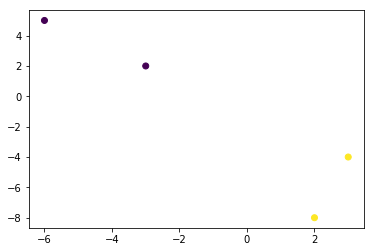

In [3]:
plt.scatter([-3, -6, 3, 2], [2, 5, -4, -8], c=y)

In [4]:
x

array([[-3,  2],
       [-6,  5],
       [ 3, -4],
       [ 2, -8]])

In [5]:
x[2,1]

-4

In [8]:
x[:,1]

array([ 2,  5, -4, -8])

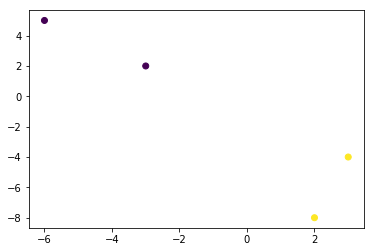

In [10]:
plt.scatter(x[:,0],x[:,1], c=y)

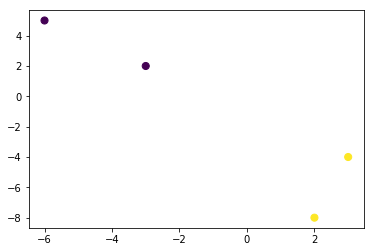

In [13]:
plt.scatter(x[:,0],x[:,1], s=50,c=y)

### SVM 支持向量機

支持向量機, 大家都用英文縮寫 SVM 稱呼。是一個用曲線把資料分隔的辦法。在高維度的時候自然就是曲面 (超曲面) 分隔資料的方法。

In [14]:
from sklearn.svm import SVC

In [15]:
clf = SVC()

In [16]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 預測結果

In [17]:
clf.predict([[-3,2]])

array([1])

In [18]:
clf.predict(x)

array([1, 1, 2, 2])

In [19]:
clf.predict([[2.5,3]])

array([1])

#### meshgrid

In [20]:
xx = [1,2,3,4]
yy = [5,6,7,8]

In [21]:
X, Y = np.meshgrid(xx,yy)

In [22]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [25]:
Y

array([[-8.        , -8.        , -8.        , -8.        , -8.        ,
        -8.        , -8.        , -8.        , -8.        , -8.        ,
        -8.        , -8.        , -8.        , -8.        , -8.        ,
        -8.        , -8.        , -8.        , -8.        , -8.        ,
        -8.        , -8.        , -8.        , -8.        , -8.        ,
        -8.        , -8.        , -8.        , -8.        , -8.        ],
       [-7.55172414, -7.55172414, -7.55172414, -7.55172414, -7.55172414,
        -7.55172414, -7.55172414, -7.55172414, -7.55172414, -7.55172414,
        -7.55172414, -7.55172414, -7.55172414, -7.55172414, -7.55172414,
        -7.55172414, -7.55172414, -7.55172414, -7.55172414, -7.55172414,
        -7.55172414, -7.55172414, -7.55172414, -7.55172414, -7.55172414,
        -7.55172414, -7.55172414, -7.55172414, -7.55172414, -7.55172414],
       [-7.10344828, -7.10344828, -7.10344828, -7.10344828, -7.10344828,
        -7.10344828, -7.10344828, -7.10344828, -7

In [27]:
X,Y = np.meshgrid(np.linspace(-6,3,30), np.linspace(-8,5,30))
X

array([[-6.        , -5.68965517, -5.37931034, -5.06896552, -4.75862069,
        -4.44827586, -4.13793103, -3.82758621, -3.51724138, -3.20689655,
        -2.89655172, -2.5862069 , -2.27586207, -1.96551724, -1.65517241,
        -1.34482759, -1.03448276, -0.72413793, -0.4137931 , -0.10344828,
         0.20689655,  0.51724138,  0.82758621,  1.13793103,  1.44827586,
         1.75862069,  2.06896552,  2.37931034,  2.68965517,  3.        ],
       [-6.        , -5.68965517, -5.37931034, -5.06896552, -4.75862069,
        -4.44827586, -4.13793103, -3.82758621, -3.51724138, -3.20689655,
        -2.89655172, -2.5862069 , -2.27586207, -1.96551724, -1.65517241,
        -1.34482759, -1.03448276, -0.72413793, -0.4137931 , -0.10344828,
         0.20689655,  0.51724138,  0.82758621,  1.13793103,  1.44827586,
         1.75862069,  2.06896552,  2.37931034,  2.68965517,  3.        ],
       [-6.        , -5.68965517, -5.37931034, -5.06896552, -4.75862069,
        -4.44827586, -4.13793103, -3.82758621, -3

#### ravel 拉平法

In [32]:
X = X.ravel()
Y = Y.ravel()

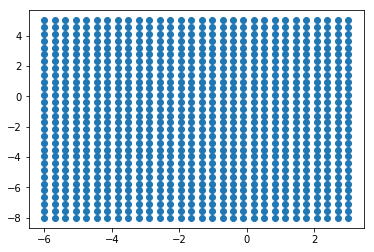

In [33]:
plt.scatter(X, Y)

#### zip 高級組合法

In [34]:
xx = [1,2,3,4]
yy = [5,6,7,8]

In [35]:
list(zip(xx,yy))

[(1, 5), (2, 6), (3, 7), (4, 8)]

In [36]:
Z = clf.predict(list(zip(X,Y)))

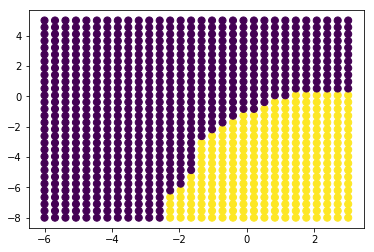

In [37]:
plt.scatter(X, Y, s=50, c=Z)